In [1]:
%load_ext autoreload
%autoreload 2
import tifffile
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from dask_image.ndfilters import gaussian_filter
from dask_image.imread import imread
from palmari.processing.steps import BaseDetector
from palmari import TifPipeline, Acquisition, Experiment

In [2]:
#f = tifffile.imread("/Users/hverdier/Desktop/EOSGag_002.tif")
#tifffile.imwrite("/Users/hverdier/Desktop/EOSGag_short_002.tif",f[:1000])

In [3]:
img = imread("/Users/hverdier/Desktop/test_palmari/EOSGag_short_002.tif")
f_img = gaussian_filter(img,sigma=(100,2,2),mode="nearest")

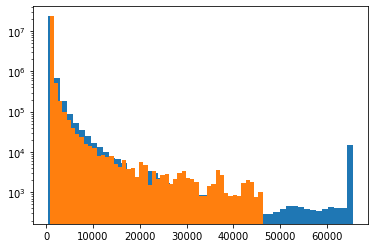

In [4]:
plt.hist(np.reshape(img.compute(),(-1)),bins=50)
plt.hist(np.reshape(f_img.compute(),(-1)),bins=50)
plt.yscale("log")

In [38]:
tp = TifPipeline.from_yaml("/Users/hverdier/Desktop/drift_corr")

In [39]:
#exp = Experiment.from_single_tif("/Users/hverdier/Desktop/test_palmari/EOSGag_short_002.tif","/Users/hverdier/Desktop/test_palmari")
exp = Experiment.from_single_tif("/Users/hverdier/Desktop/test_palmari_long/EOSGag_002.tif","/Users/hverdier/Desktop/test_palmari_long")

In [40]:
exp.pixel_size

0.097

Frame 3999: 29 trajectories present.


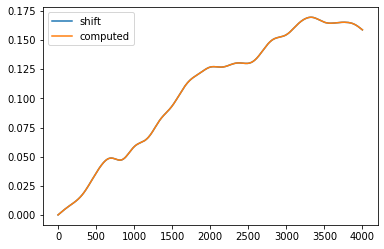

In [43]:
tp.process(exp, force_reprocess=True)

In [44]:
for f in exp:
    print(f)
    acq = Acquisition(f, exp, tp)

EOSGag_001.tif


In [45]:
acq.view(min_traj_length=5)

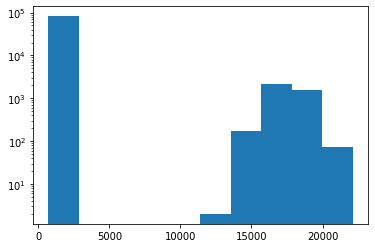

In [37]:
plt.hist(acq.locs.bg)
plt.yscale("log")

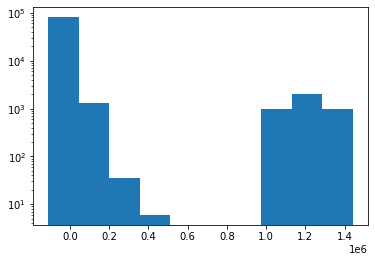

In [36]:
plt.hist(acq.locs.I0)
plt.yscale("log")

In [8]:
img_gaussian.shape

NameError: name 'img_gaussian' is not defined

In [ ]:
plt.imshow(img_gaussian[0])

In [ ]:
plt.hist(np.reshape(img,(-1,)))
plt.yscale("log")

In [ ]:
plt.imshow(img[1])

In [ ]:
plt.hist(np.reshape(np.mean(img,axis=0),(-1,)))
plt.yscale("log")

In [ ]:
plt.imshow(np.mean(img,axis=0))